In [1]:
%matplotlib inline
import plot_helpers as ph
from plot_helpers import PlotDef, DataEntry

In [7]:
fairgp_files = [
    ('../results/parity_min_max/adult_race_numerical-binsensitive.csv', 'Adult (race)'),
    ('../results/parity_min_max/adult_sex_numerical-binsensitive.csv', 'Adult (gender)'),
]
def label_change(label):
    if "min" in label or "max" in label:
        return  # we don't want those
    parts = label.split('_')
    #mode = parts[-1]
    in_True = parts[4] == "True"
    optional_star = "*" if in_True else ""
    return f"FairGPparity{optional_star}", in_True
    #return "average" if mode == "True" else mode, True

fairgp = ph.parse_all(fairgp_files, label_change)

In [8]:
baseline_files = [
    ('../results/parity_opp_update_2018-08-28/par_fixed/adult_race_baseline.csv', 'Adult (race)'),
    ('../results/parity_opp_update_2018-08-28/par_fixed/adult_sex_baseline.csv', 'Adult (gender)'),
]
def label_change(label):
    algos = [
        'ZafarFairness',
        'ZafarAccuracy',
        'SVM',
        'GP',
        #'DecisionTree',
    ]
    if label in algos:
        return label, True

baselines = ph.parse_all(baseline_files, label_change)

In [9]:
data = ph.merge_plot_defs(fairgp, baselines)

In [10]:
data = ph.reorder_entries(data, [0, 1, 2, 3, 4, 5])

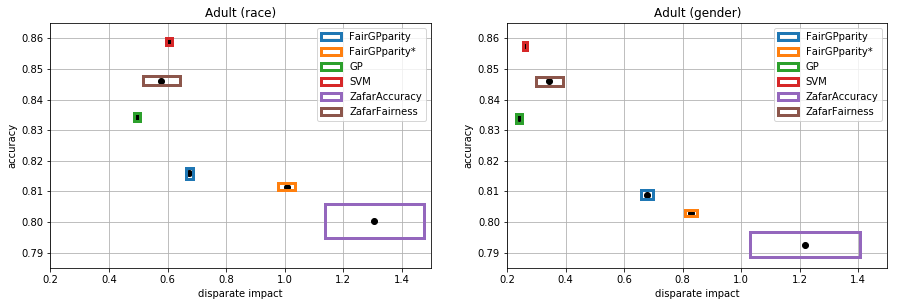

In [11]:
xaxis = ('DIbinary', 'disparate impact')
yaxis = ('accuracy', 'accuracy')
fig, plots = ph.plot_all(ph.errorbox, data, xaxis, yaxis, figsize=(15, 4.5))
for plot_column in plots:
    for plot in plot_column:
        plot.set_ylim(0.785, 0.865)
        plot.set_xlim(0.2, 1.5)
#fig.savefig('dempar_vary_beta.eps', bbox_inches='tight')